In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
IMG_PATH = r"C:\Users\Admin\Pictures\new wallpapers\jinx-smile-lol-2k-wallpaper-uhdpaper.com-569@2@a.jpg"
def show_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

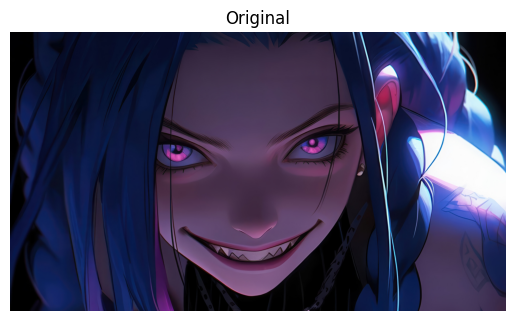

In [3]:
img = cv2.imread(IMG_PATH)
if img is None:
    print("Image not found")
    exit()
show_image(img, "Original")

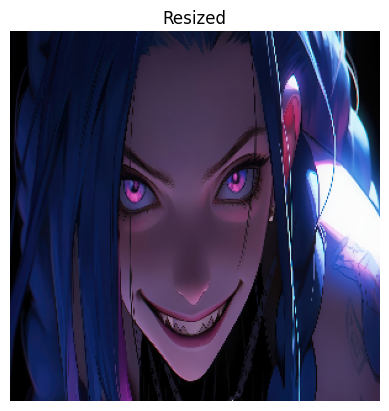

In [4]:
img_resized = cv2.resize(img, (300, 300))
show_image(img_resized, "Resized")

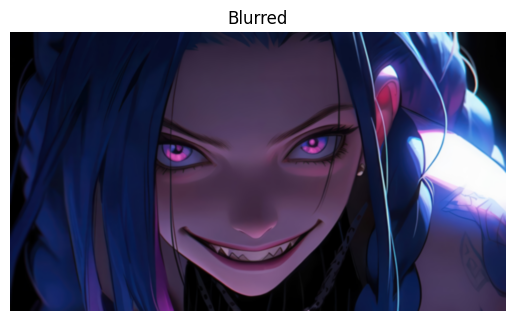

In [5]:
img_blurred = cv2.GaussianBlur(img, (15, 15), 0)
show_image(img_blurred, "Blurred")

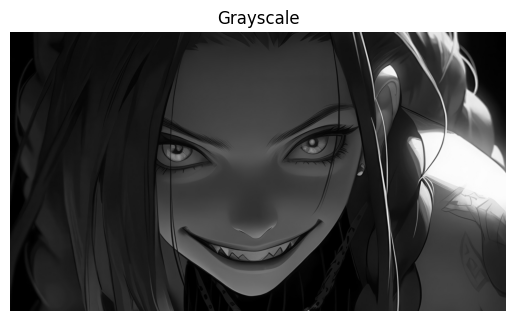

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image(img_gray, "Grayscale")

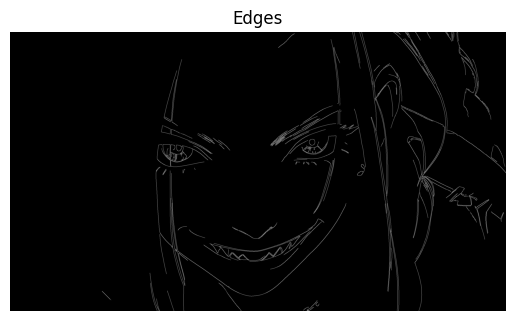

In [7]:
img_edges = cv2.Canny(img_gray, 100, 200)
show_image(img_edges, "Edges")

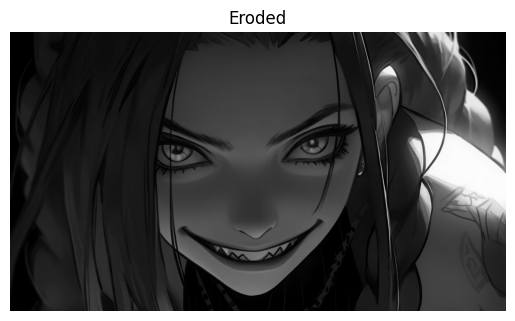

In [8]:
kernel = np.ones((5, 5), np.uint8)
img_eroded = cv2.erode(img_gray, kernel, iterations=1)
show_image(img_eroded, "Eroded")

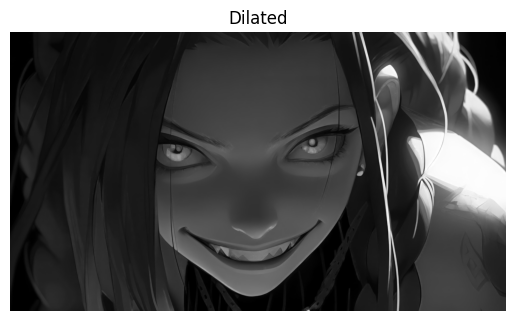

In [9]:
img_dilated = cv2.dilate(img_gray, kernel, iterations=1)
show_image(img_dilated, "Dilated")

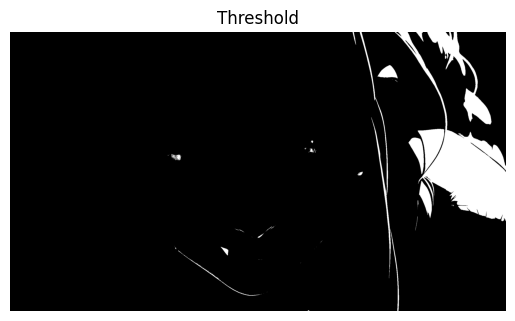

In [10]:
_, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
show_image(img_thresh, "Threshold")

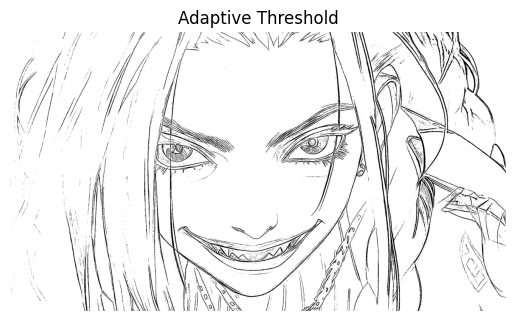

In [11]:
img_adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
show_image(img_adaptive, "Adaptive Threshold")

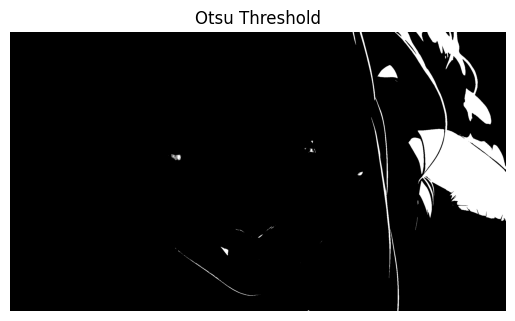

In [12]:
_, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_image(img_otsu, "Otsu Threshold")

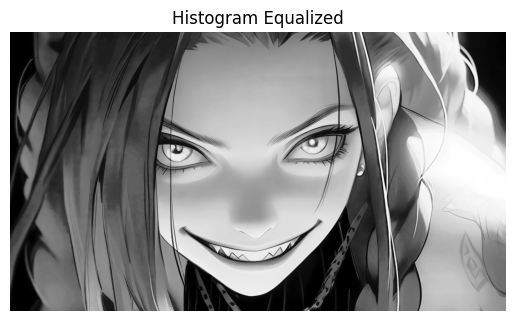

In [13]:
img_hist_eq = cv2.equalizeHist(img_gray)
show_image(img_hist_eq, "Histogram Equalized")

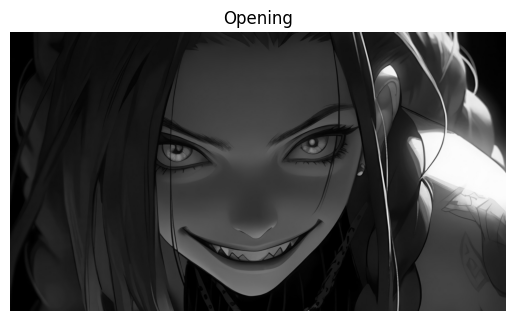

In [14]:
img_open = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
show_image(img_open, "Opening")

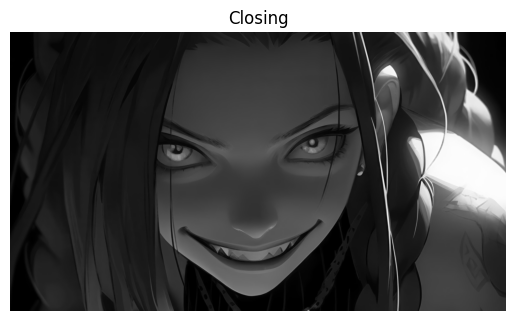

In [15]:
img_close = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)
show_image(img_close, "Closing")

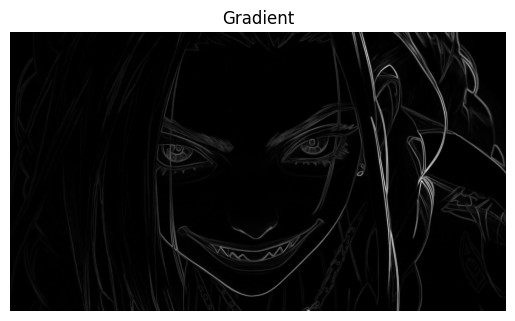

In [16]:
img_grad = cv2.morphologyEx(img_gray, cv2.MORPH_GRADIENT, kernel)
show_image(img_grad, "Gradient")

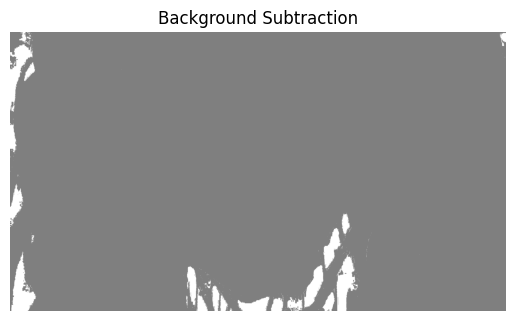

In [17]:
fgbg = cv2.createBackgroundSubtractorMOG2()
fgmask = fgbg.apply(img)
show_image(fgmask, "Background Subtraction")

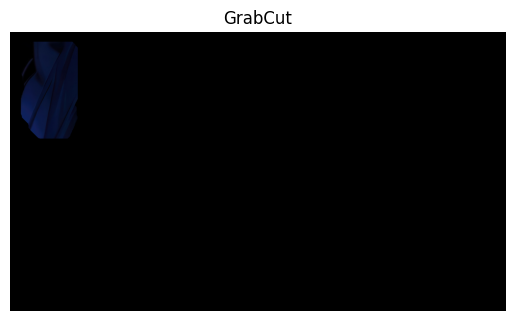

In [18]:
mask = np.zeros(img.shape[:2], np.uint8)
rect = (50, 50, 300, 500)
bgd = np.zeros((1, 65), np.float64)
fgd = np.zeros((1, 65), np.float64)
cv2.grabCut(img, mask, rect, bgd, fgd, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img_grabcut = img * mask2[:, :, np.newaxis]
show_image(img_grabcut, "GrabCut")

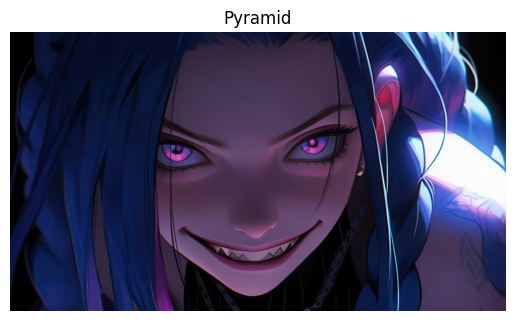

In [19]:
img_pyramid = cv2.pyrDown(img)
show_image(img_pyramid, "Pyramid")